In [2]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras

Using TensorFlow backend.


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
K.image_data_format()

'channels_last'

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
x_test.shape

(10000, 28, 28, 1)

<h3>Model Discription</h3>
<h4>3 Convolutional Layers + 2 Hidden Layers +Kernals  4, +poolsize 2</h4>

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4),strides=1,
                 activation='relu',
                 input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(4, 4),strides=1,
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(4, 4),strides=1,
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 64)          256       
__________

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 282us/step - loss: 0.9867 - acc: 0.6914 - val_loss: 0.1732 - val_acc: 0.9463
Epoch 2/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.2929 - acc: 0.9106 - val_loss: 0.0888 - val_acc: 0.9725
Epoch 3/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.1980 - acc: 0.9406 - val_loss: 0.0696 - val_acc: 0.9785
Epoch 4/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.1612 - acc: 0.9522 - val_loss: 0.0480 - val_acc: 0.9855
Epoch 5/15
60000/60000 [==============================] - 13s 211us/step - loss: 0.1372 - acc: 0.9591 - val_loss: 0.0432 - val_acc: 0.9865
Epoch 6/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.1232 - acc: 0.9637 - val_loss: 0.0380 - val_acc: 0.9879
Epoch 7/15
60000/60000 [==============================] - 13s 208us/step - loss: 0.1114 - acc: 0.9677 - val_loss: 0.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  fig.canvas.draw()
  plt.show()

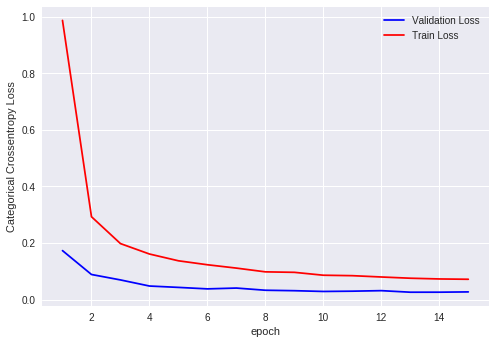

In [13]:
nb_epoch=15
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.02390892838094733
Test accuracy: 0.9931


<h3>Model Discription</h3>
<h4>5 Convolutional Layers + 2 Hidden Layers+ Kernals  4, 3 +poolsize 2</h4>

In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(4, 4),strides=1,
                 activation='relu',
                 input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(4, 4),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(4, 4),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(4, 4),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=(3, 3),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))

model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        272       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 7, 7, 32)          128       
__________

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 322us/step - loss: 1.6354 - acc: 0.4702 - val_loss: 0.9892 - val_acc: 0.7134
Epoch 2/15
60000/60000 [==============================] - 16s 272us/step - loss: 0.5353 - acc: 0.8315 - val_loss: 0.2760 - val_acc: 0.9258
Epoch 3/15
60000/60000 [==============================] - 17s 279us/step - loss: 0.3335 - acc: 0.9030 - val_loss: 0.1357 - val_acc: 0.9637
Epoch 4/15
60000/60000 [==============================] - 16s 272us/step - loss: 0.2535 - acc: 0.9291 - val_loss: 0.0944 - val_acc: 0.9734
Epoch 5/15
60000/60000 [==============================] - 16s 273us/step - loss: 0.2078 - acc: 0.9415 - val_loss: 0.0869 - val_acc: 0.9766
Epoch 6/15
60000/60000 [==============================] - 16s 270us/step - loss: 0.1826 - acc: 0.9487 - val_loss: 0.0781 - val_acc: 0.9793
Epoch 7/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.1606 - acc: 0.9570 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.029101076152408496
Test accuracy: 0.9915


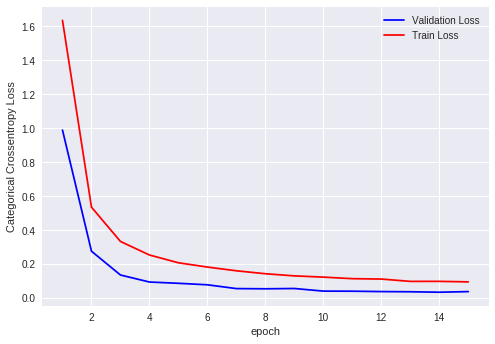

In [18]:
nb_epoch=15
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Model Discription</h3>
<h4>7  Convolutional Layers + 2 Hidden Layers +  Kernals 5, 4, 2 +poolsize 2</h4>

In [19]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5),strides=1,
                 activation='relu',
                 input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(Conv2D(16, kernel_size=(5,5),strides=1,
                 activation='relu',
                 input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(4, 4),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(4, 4),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(4, 4),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=(3, 3),strides=1,
                 activation='relu',padding='same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 7, 7, 16)          64        
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 32)          8224      
__________

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 21s 351us/step - loss: 2.1477 - acc: 0.2775 - val_loss: 1.1750 - val_acc: 0.5189
Epoch 2/15
60000/60000 [==============================] - 17s 278us/step - loss: 0.9943 - acc: 0.6363 - val_loss: 0.3476 - val_acc: 0.8767
Epoch 3/15
60000/60000 [==============================] - 17s 285us/step - loss: 0.5715 - acc: 0.8051 - val_loss: 0.2286 - val_acc: 0.9296
Epoch 4/15
60000/60000 [==============================] - 17s 284us/step - loss: 0.3900 - acc: 0.8838 - val_loss: 0.1265 - val_acc: 0.9659
Epoch 5/15
60000/60000 [==============================] - 17s 281us/step - loss: 0.2847 - acc: 0.9235 - val_loss: 0.0958 - val_acc: 0.9733
Epoch 6/15
60000/60000 [==============================] - 16s 275us/step - loss: 0.2326 - acc: 0.9394 - val_loss: 0.0747 - val_acc: 0.9795
Epoch 7/15
60000/60000 [==============================] - 17s 283us/step - loss: 0.2020 - acc: 0.9473 - val_loss: 0.

In [21]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0429166797939688
Test accuracy: 0.9886


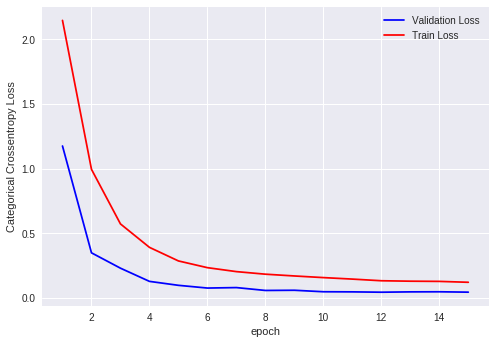

In [22]:
nb_epoch=15
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
!pip install prettytable

<h1>Report</h1>

Convert class variable into categorical data vector

Trying out different  Convolution Layers like 3, 5 and 7.

Using kernel -size (3,3) ,(4,4) (5,5) and PoolSize of  (2,2) 

As the data set is not too large adding dropout to ensure that the model does not overfit

By flattening the final convolution output and passing into a fully connected nuerral network with a softmax Classifier with 10 outputs

As no of convolutional layers increases model seems to be slightly overfitting and hence test accuracy is dropping slightly 

In [0]:
from prettytable import PrettyTable

In [0]:
x = PrettyTable()

x.field_names = ["No of ConvolutionalLayers", "No of HiddenLayers","Train loss","Train Acc","Test Loss","Test Acc"]

x.add_row(["3", "2",  0.0717 , 0.9789 , 0.0239, 0.9931])
x.add_row(["5", "2", 0.0920 , 0.9758 , 0.0291 , 0.9915])
x.add_row(["7","2" , 0.1150 , 0.9707 , 0.0363, 0.9897])

print(x)

+---------------------------+--------------------+------------+-----------+-----------+----------+
| No of ConvolutionalLayers | No of HiddenLayers | Train loss | Train Acc | Test Loss | Test Acc |
+---------------------------+--------------------+------------+-----------+-----------+----------+
|             3             |         2          |   0.0717   |   0.9789  |   0.0239  |  0.9931  |
|             5             |         2          |   0.092    |   0.9758  |   0.0291  |  0.9915  |
|             7             |         2          |   0.115    |   0.9707  |   0.0363  |  0.9897  |
+---------------------------+--------------------+------------+-----------+-----------+----------+
